   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

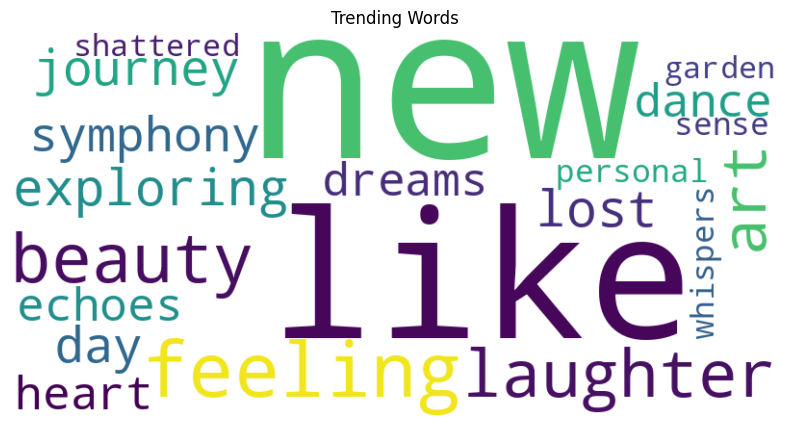

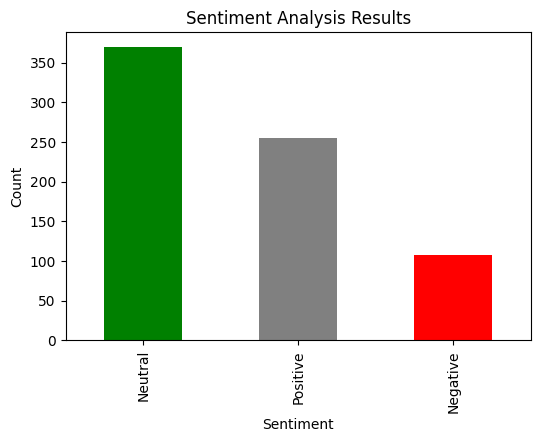

Processed data saved as 'processed_data.csv'.


In [4]:
# Install necessary libraries
!pip install textblob wordcloud --quiet

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset 
df = pd.read_csv('/kaggle/input/adwinfutureinterstask1/sentimentdataset.csv')  # Update with the correct path

# Display the first some rows
print(df.head())




def clean_text(text):
    text = str(text).lower()  
    text = ' '.join(word for word in text.split() if word.isalnum())  # Remove special characters
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

# Sentiment Analysis using TextBlob
df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Trending Topics (Word Frequency)
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['cleaned_text'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Word Cloud Visualization
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Trending Words")
plt.show()

# Sentiment Distribution
plt.figure(figsize=(6,4))
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Save processed dataset
df.to_csv('/kaggle/working/processed_data.csv', index=False)
print("Processed data saved as 'processed_data.csv'.")
